# Summary

The methods in this notebook disregard the temporal nature of the timeseries and consider the input dataset as a tabular dataset (no temporal dependency between samples).

Traditional anomaly detection approach with pyOD https://pyod.readthedocs.io/en/latest/index.html

Tutorial examples: https://pyod.readthedocs.io/en/latest/example.html

Most of the methods in this package are designed for tabular data and disregard the temporal nature of the timeseries, which can lead to a loss of performance compared to dedicated TS methods. 

For using pyOD on tabular data, check the tods extension (https://github.com/datamllab/tods).

For using pyOD on graph data, check the pygod extension (https://github.com/pygod-team/pygod/).

In [1]:
import sys
sys.path.append('../src')
import evaluation_utils, data_utils
import numpy as np
from pyod.models.ecod import ECOD
import json

X shape: (1831, 21), y shape: (1831,)


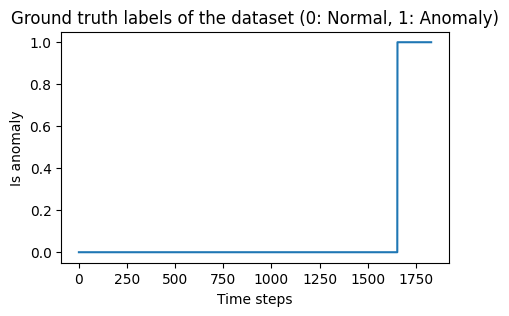

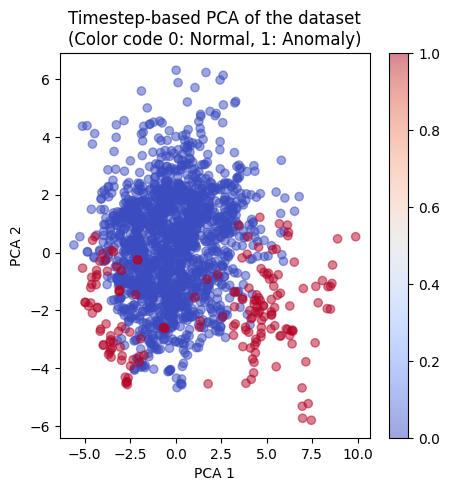

In [2]:
# Data loading
X, y = data_utils.get_data('../data/6_cardio.npz')
data_utils.plot_dataset(X, y)

In [3]:
# Model training
clf = ECOD() # Replace this with any other model you want to test https://pyod.readthedocs.io/en/latest/
clf.fit(X)
predicted_anomalies = clf.decision_scores_ 

In [4]:
# Perform evaluation
scores = evaluation_utils.run_evaluation(y, predicted_anomalies, do_point_adjustment=True)

In [5]:
# Pretty print results
print(json.dumps(scores, indent=4))

{
    "AUCROC": 0.9350006866245537,
    "AUCPR": 0.5674131327593924,
    "F1": 0.609751502447214,
    "Precision": 0.47468354430379744,
    "Recall": 0.8522727272727273,
    "Adjusted AUCROC": 1.0,
    "Adjusted AUCPR": 1.0,
    "Adjusted F1": 0.9999950000249999,
    "Adjusted Precision": 1.0,
    "Adjusted Recall": 1.0
}


In [6]:
# results are saved in a .npz file
data_utils.save_results(f"results/pyod ECOD.npz", scores)

Results saved to results/pyod ECOD.npz
